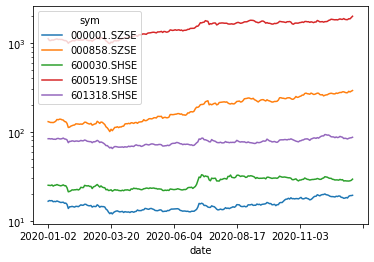

In [82]:
# 5530, review

# tutorial 1
import pandas as pd
stockdata = pd.read_csv("stockdata.csv")
stockdata.shape # (1215, 8)
stockdata.head()
stockdata.tail()

set(stockdata['sym']) 
# {'000001.SZSE', '000858.SZSE', '600030.SHSE', '600519.SHSE', '601318.SHSE'}
# 000001.SZSE, Ping An Bank 平安银行
# 000858.SZSE, Wuliangye 五粮液
# 600030.SHSE, CITIC Securities 中信证券
# 600519.SHSE, Kweichow Moutai, 贵州茅台
# 601318.SHSE, Ping An Insurance, 中国平安

# add month
stockdata["month"] = stockdata["date"].apply(lambda x: x[:7])
# add daily return
#stockdata["rtn"] = stockdata[["sym", "close"]].groupby("sym").apply(lambda x : x[["close"]].diff() / x[["close"]])
import numpy as np
def addDailyRtn(df):
  L = len(df)
  df['rtn'] = np.nan
  previous_close = df.loc[0, 'close']
  previous_sym = df.loc[0, 'sym']
  i = 1
  while i<L:
    current_close = df.loc[i, 'close']
    current_sym = df.loc[i, 'sym']
    if current_sym == previous_sym: # avoid different symbols
      df.loc[i, 'rtn'] = (current_close - previous_close)/previous_close
    previous_close = current_close
    previous_sym = current_sym
    i = i + 1
  return 
addDailyRtn(stockdata)

### ADT, ADTV and Volatility

# basic statistic analysis for every sym/symbol
symbols = ['000001.SZSE', '000858.SZSE', '600030.SHSE', '600519.SHSE', '601318.SHSE']
tmp = stockdata.loc[ stockdata['sym'] == symbols[0] ]
tmp[["sym", "volume", "notional", "rtn"]].agg({"volume" : "mean", "notional" : "mean", "rtn" : "std"})
  # show them together, group by symbol
stockdata[["sym", "volume", "notional", "rtn"]].groupby("sym").agg({"volume" : "mean", "notional" : "mean", "rtn" : "std"})
  # show them together, group by symbol & month
stockdata[["month", "sym", "volume", "notional", "rtn"]].groupby(["month", "sym"]).agg({"volume": "mean", "notional" : "mean", "rtn" : "std"})

# pivot function to reshaped table organized by given index / column values
stocks = stockdata.pivot(index = "date", columns = "sym", values = "rtn")
stocks
# Calculate correlation matrix
stocks.corr()

#
close = stockdata.pivot(index = "date", columns = "sym", values = "close")
close.plot(logy = True)

# save to file
# stocks.to_csv("output.csv")

In [83]:
# 5530, review

# tutorial 2
import pandas as pd
trade = pd.read_csv("trade.csv")
# add minute
trade["minute"] = trade["time"].apply(lambda x: x[:5])
trade.head()
trade.tail()

quote = pd.read_csv("quote.csv")
# add minute
quote["minute"] = quote["time"].apply(lambda x: x[:5])
# add spread, qsize
  # Bid Ask Spread (bps) = 10000*(ask-bid)/mid quote
quote["spread"] = 10000 * (quote["ask"] - quote["bid"]) / 0.5 / (quote["ask"] + quote["bid"])
  # Avg quote size = 0.5*(ask size + bid size)
quote["qsize"] = 0.5 * (quote["asize"] + quote["bsize"])
quote.head()
quote.tail()

# groupby, for every minute including open, high, low, close in the trade table.
tmp = trade.groupby(["sym", "date", "minute"])
atrade = tmp.agg( open = ('price', 'first'), max = ('price', 'max'), low = ('price', 'min'), close = ('price', 'last'), vol = ('size', 'sum') )
atrade

# groupby, for every minute, mean for spread and qsize.
tmp = quote.groupby(["sym", "date", "minute"])
aquote = tmp.agg({"spread" : "mean", "qsize" : "mean"})
aquote

# join the tables ( trade & quote ) together.
  # by sym, date, minute
mq = atrade.join(aquote)
mq


open      max  ...     spread        qsize
sym         date       minute                  ...                        
000001.SZSE 2020-12-02 09:25   19.93  19.9300  ...        NaN          NaN
                       09:30   19.95  19.9800  ...  12.323798    13624.150
                       09:31   19.86  19.9000  ...  11.331945    11594.025
                       09:32   19.84  19.9700  ...  10.787368    17657.925
                       09:33   19.97  20.0299  ...  10.258969    14381.475
...                              ...      ...  ...        ...          ...
600030.SHSE 2020-12-31 14:53   29.37  29.4000  ...   3.402924   103090.000
                       14:54   29.41  29.4100  ...   3.401476    97752.500
                       14:55   29.40  29.4000  ...   3.402402   183782.500
                       14:56   29.39  29.4000  ...   0.850629  1208370.475
                       15:00   29.40  29.4000  ...   3.401939   435899.000

[10557 rows x 7 columns]

In [117]:
# 5530, review

# tutorial 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Object Creation
s = pd.Series([1,3,5,np.nan,6,8])
s

dates = pd.date_range('20130101', periods=6)
dates

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

list('ABCD')

df2 = pd.DataFrame({'A':1.,
          'B':pd.Timestamp('20130102'),
          'C':pd.Series(1,index=list(range(4)),dtype='float32'),
          'D':np.array([3]*4,dtype='int32'),
          'E':pd.Categorical(["test","train","test","train"]),
          'F':'foo'}
          )
df2
df2.dtypes


# Viewing Data
df.head(3)
df.tail(3)
df.index
df.columns
df.values
df.describe()
df.T
df.sort_index(axis=1, ascending=False)
df.sort_values(by='B')

# Selection, Getting
df['A']
df[0:3]
df['20130102':'20130104']
  # Selection by Label
df.loc[dates[0]]
dates[0]
df.loc[:,['A','B']]
df.loc['20130102':'20130104',['A','B']]
df.loc['20130102',['A','B']]
df.loc[dates[0],'A']
df.iloc[3]
df.iloc[3:5,0:2]
df.iloc[[1,2,4],[0,2]]
df.iloc[1:3,:]
df.iloc[:,1:3]
df.iloc[1,1]
df.iat[1,1]

# Boolean Indexing
df[df.A > 0]
df.A > 0
df[df > 0]
df > 0
df2 = df.copy()
df2['E'] = ['one','one', 'two','three','four','three']
df2
df2[df2['E'].isin(['two','four'])]
df2['E'].isin(['two','four'])

# Setting
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))
s1
df['F'] = s1
df
df.at[dates[0],'A'] = 0
df
df.iat[0,1] = 0
df.loc[:,'D'] = np.array([5] * len(df))
np.array([5] * len(df))
df
df2 = df.copy()
df2[df2 > 0] = -df2
df2

# Missing Data
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1
df1.loc[dates[0]:dates[1],'E'] = 1
df1
df1.dropna(how='any')
df1.fillna(value=5)
pd.isnull(df1)

# Operations
  # Stats
df.mean()
df.mean(1)
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s
df.sub(s, axis='index')

# Apply
df.apply(np.cumsum)
df.apply(lambda x: x.max() - x.min())
# Histogramming
s = pd.Series(np.random.randint(0, 7, size=10))
s
s.value_counts()

# String Methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

2021-04-11T14:23:04.344Z loop_i= 1  ,Fetched 132 candles
[ 2020-12-01T00:00:00.000Z -- 2021-04-11T00:00:00.000Z ]


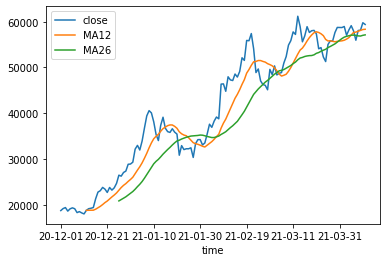

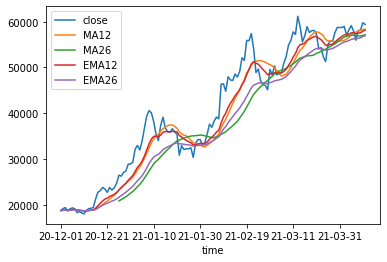

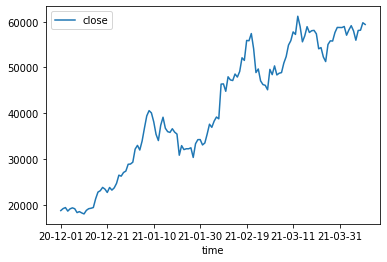

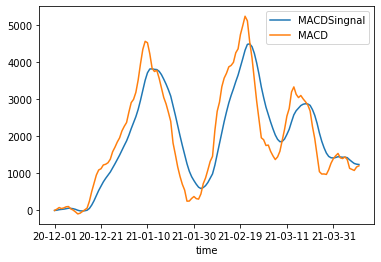

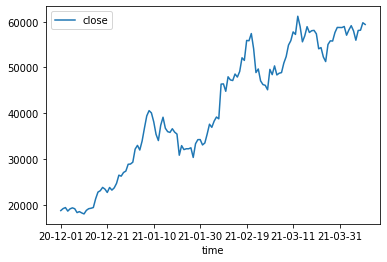

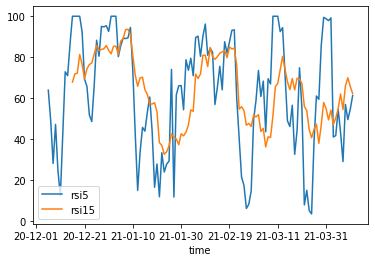

In [130]:
# 5530, review

# tutorial 4
import time
#!pip install ccxt
import ccxt
from time import gmtime, strftime
import datetime
import pandas as pd
# print(ccxt.exchanges)

# we set the exchange to binance
exchange = ccxt.binance()
# we define a function to get the bar from one currency to another. We get at most
# 2000 data each time due to the exchange's transmision length limitation.
def get_bar_from_to(ex,symbol,period,start_time,end_time,length=2000,maxLoop=20):
  data = []
  stime = ex.parse8601(start_time) # ISO8601 is the format of time
  etime = ex.parse8601(end_time)
  loop_i = 0
  if ex.has['fetchOHLCV']:
    while stime < etime and loop_i < maxLoop:
      loop_i += 1
      try:
        ohlcvs = ex.fetch_ohlcv(symbol, period, stime, limit=length)
        print(ex.iso8601(ex.milliseconds()),'loop_i=',loop_i, ' ,Fetched', len(ohlcvs), 'candles')
        if len(ohlcvs) > 1:
          first = ohlcvs[0][0]
          last = ohlcvs[-1][0]
          print('[',ex.iso8601(first),'--', ex.iso8601(last),']')
          stime = int(last+ (last - first)/(len(ohlcvs)-1))
          data += ohlcvs
          time.sleep(1)
        else:
          return data
      except Exception as e:
        print(str(e))
  return data

# Let's have an example
start_time = '2020-12-01 00:00:00'
end_time = '2021-03-04 23:00:00'
symbol = 'BTC/USDT'
period = '1d' # '1d', '1m', '5m'
data0 = exchange.fetch_ohlcv(symbol, period, exchange.parse8601(start_time))
# ohlcv is open, high, low, close, volume
data0[:10]

data = get_bar_from_to(exchange,symbol,period, start_time, end_time)
test = pd.DataFrame(data, columns=['time','open','high','low','close','volume'])
test

# convert the time format
test['time'] = test['time'].apply(lambda x: exchange.iso8601(x)[2:10])
test

# Technical Indicators
  # MA (Moving Average)
ti = test[['time', 'close']].copy()
ti['MA12'] = ti['close'].transform(lambda x: x.rolling(window = 12).mean())
ti['MA26'] = ti['close'].transform(lambda x: x.rolling(window = 26).mean())
ti
ti.plot(x = 'time', y = ['close', 'MA12', 'MA26'])

# Exponential Moving Averages (EMA)
ti['EMA12'] = ti['close'].transform(lambda x: x.ewm(span=12, adjust=False).mean())
ti['EMA26'] = ti['close'].transform(lambda x: x.ewm(span=26, adjust=False).mean())
ti

ti.plot(x = 'time', y = ['close', 'MA12', 'MA26', 'EMA12', 'EMA26'])

# Moving Average Convergence Divergence (MACD)
ti['MACD'] = ti['EMA12'] - ti['EMA26']
ti['MACDSingnal'] = ti['MACD'].transform(lambda x: x.ewm(span=9, adjust=False).mean())
# Just to make it more clear to compare MACDSingnal and MACD
#ti['MACDSingnal'] *= 5
#ti['MACD'] *= 5
ti
ti.plot(x = 'time', y = ['close'])
ti.plot(x = 'time', y = ['MACDSingnal', 'MACD'])

# Relative Strength Index (RSI)
def calc_rsi(seris, win):
  diff = seris.transform(lambda x: x.diff())
  up = diff.copy()
  up.loc[up<0] = 0
  down = -diff.copy()
  down.loc[down<0] = 0
  upavg = up.transform(lambda x: x.rolling(window = win).mean())
  downavg = down.transform(lambda x: x.rolling(window = win).mean())
  rs = upavg / downavg
  rsi = 100 - (100/(1+rs))
  return rsi

ti['rsi5'] = calc_rsi(ti['close'], 5)
ti['rsi15'] = calc_rsi(ti['close'], 15)

ti.plot(x = 'time', y = ['close'])
ti.plot(x = 'time', y = ['rsi5', 'rsi15'])

In [ ]:
# 5530, review

# tutorial 9

# https://www.joinquant.com/
#!pip install jqdatasdk
from jqdatasdk import *
ID = '18810925036'
pwd = 'jqTest666'
auth(ID, pwd)
count=get_query_count()
print(count)

# Get the information for index securities
ai = get_all_securities(types=['index'], date=None)
ai

# Get the information for all securities
a = get_all_securities(types=[], date=None)
a

# Get
stocks = get_index_stocks('000300.XSHG')#沪深300成份股
print(stocks[:20])

# get sectors
sector = get_industries(name='sw_l1', date=None)#申万⼀级⾏业
sector

# Get sectors
sector = get_industries(name='jq_l2', date=None)
sector

"""
"sw_l1": 申万⼀级⾏业
"sw_l2": 申万⼆级⾏业
"sw_l3": 申万三级⾏业
"jq_l1": 聚宽⼀级⾏业
"jq_l2": 聚宽⼆级⾏业
"zjw": 证监会⾏业
"""

# Get the weight for SSE Composite Index in 2018-05-09
df = get_index_weights(index_id="000001.XSHG", date="2018-05-09")
df

# Get index stocks
stocks = get_index_stocks('000300.XSHG')
stocks[:10]

mf = get_money_flow(['000001.XSHE', '000040.XSHE', '000099.XSHE'], '2020-07-01', '2020-07-01')
mf

indexprice = get_price(['000001.XSHG','399006.XSHE','399001.XSHE','399905.XSHE','000300.XSHG'],
start_date='2019-01-01', end_date='2020-07-28', frequency='1d')
indexprice

futureprice = get_price(['IC9999.CCFX','IF9999.CCFX','IH9999.CCFX',], start_date='2018-01-01', end_date='2020-08-29', frequency='1d')
futureprice

# !pip install tushare
import tushare as ts
import datetime

ts.get_hist_data('600848')

In [7]:
# assignment 2 ------------ draft:
import pandas as pd

parent_order = pd.read_csv('parent_order.csv')
parent_order.shape # (5, 9)
parent_order


,date,strategy,sym,orderid,side,starttime,endtime,qty,targetpct
0,2020-12-02,VWAP,000001.SZSE,V001,-1,9:25,11:00,800000,NaN
1,2020-12-03,VWAP,600030.SHSE,V002,1,10:00,14:00,754400,NaN
2,2020-12-09,VWAP,000001.SZSE,V003,1,9:25,10:00,236400,NaN
3,2020-12-14,VWAP,600030.SHSE,V004,-1,9:25,15:00,989000,NaN
4,2020-12-15,VWAP,000001.SZSE,V005,-1,9:25,15:00,1789300,NaN


In [13]:
child_order = pd.read_csv('child_order.csv')
child_order.shape # (574, 7)
child_order.head()
child_order.tail()

# add notional
child_order['notional'] = child_order['price'] * child_order['size']

# calculate sum of certain column
def col_sum(child_order, order_id, col_name):
  #
  tmp = child_order[ child_order.parentid==order_id ]
  return sum( tmp[col_name] )

# Notional
def cal_notionals(parent_order, child_order):
  notional_list = []
  L = len(parent_order)
  i = 0
  while i<L:
    tmp = parent_order.iloc[i]
    order_id = tmp['orderid']
    col_name = 'notional'
    ntn = col_sum(child_order, order_id, col_name)
    ntn = ntn/1000000 # million
    ntn = round(ntn, 2) # 2 digital accuracy
    notional_list.append(ntn)
    i = i + 1
  return notional_list

notional_list = cal_notionals(parent_order, child_order)
notional_list


[15.89, 23.39, 4.47, 28.49, 33.14]

In [56]:
trade = pd.read_csv("trade.csv")
trade.shape # (206357, 5)
trade.head()
trade.tail()

# add time_stamp
trade['time_stamp'] = pd.to_datetime( trade['date'] + ' ' + trade['time'] )

# 
def volume_sum(trade, date_time, symbol, start_time="9:25", end_time="15:00"):  
  tmp = trade[ trade.date==date_time ]
  tmp = tmp[ tmp.sym==symbol ]

  st = date_time + " " + start_time
  st = pd.to_datetime(st)
  # small delay for end-time
  if end_time == '15:00':
    end_time = '15:10'
  et = date_time + " " + end_time
  et = pd.to_datetime(et)
   
  #print(st <= et)
  tmp = tmp[ tmp.time_stamp>=st ]
  tmp = tmp[ tmp.time_stamp<=et ]
  return sum( tmp['size'] )

#volume_sum(trade, order_date, order_sym)

# 
def cal_ADV_pct(parent_order, child_order, trade, start_time="9:25", end_time="15:00"):
  ADVpct_list = []
  L = len(parent_order)
  i = 0
  while i<L:
    tmp = parent_order.iloc[i]
    #
    order_id = tmp['orderid']
    col_name = 'size'
    size1 = col_sum(child_order, order_id, col_name)
    #
    order_date = tmp['date']
    order_sym = tmp['sym']
    order_start = tmp['starttime']
    order_end = tmp['endtime']
    size2 = volume_sum(trade, order_date, order_sym, start_time, end_time)
    pct = size1 / size2 * 100 # %
    pct = round(pct, 2) # 2 digital accuracy
    ADVpct_list.append(pct)
    i = i + 1
  return ADVpct_list

# ADV%
ADVpct_list = cal_ADV_pct(parent_order, child_order, trade)
print(ADVpct_list)

# 
def cal_trading_spd(parent_order, child_order, trade):
  tradingSpd_list = []
  L = len(parent_order)
  i = 0
  while i<L:
    tmp = parent_order.iloc[i]
    #
    order_id = tmp['orderid']
    col_name = 'size'
    size1 = col_sum(child_order, order_id, col_name)
    #
    order_date = tmp['date']
    order_sym = tmp['sym']
    order_start = tmp['starttime']
    order_end = tmp['endtime']
    size2 = volume_sum(trade, order_date, order_sym, order_start, order_end)
    pct = size1 / size2 * 100 # %
    pct = round(pct, 2) # 2 digital accuracy
    tradingSpd_list.append(pct)
    i = i + 1
  return tradingSpd_list

# trading speed
tradingSpd_list = cal_trading_spd(parent_order, child_order, trade)
tradingSpd_list


[0.9, 0.79, 0.35, 1.82, 2.27]


[1.96, 1.6, 1.09, 1.82, 2.27]

In [17]:
quote = pd.read_csv("quote.csv")
quote.shape # (210360, 7)
quote.head()
quote.tail()

# add spread
quote["spread"] = 10000 * (quote["ask"] - quote["bid"]) / 0.5 / (quote["ask"] + quote["bid"])

# add time_stamp
quote['time_stamp'] = pd.to_datetime( quote['date'] + ' ' + quote['time'] )

# 
import numpy as np

def spread_avg(quote, date_time, symbol, start_time="9:25", end_time="15:00"):  
  tmp = quote[ quote.date==date_time ]
  tmp = tmp[ tmp.sym==symbol ]

  st = date_time + " " + start_time
  st = pd.to_datetime(st)
  # small delay for end-time
  if end_time == '15:00':
    end_time = '15:10'
  et = date_time + " " + end_time
  et = pd.to_datetime(et)   
  
  tmp = tmp[ tmp.time_stamp>=st ]
  tmp = tmp[ tmp.time_stamp<=et ]
  tmp = tmp.dropna() # some rows include NaN values
  tmp = tmp['spread']
  
  return sum(tmp)/len(tmp)

# 
def cal_spread(parent_order, quote):
  spread_list = []
  L = len(parent_order)
  i = 0
  while i<L:
    tmp = parent_order.iloc[i]
    #
    order_date = tmp['date']
    order_sym = tmp['sym']
    order_start = tmp['starttime']
    order_end = tmp['endtime']
    spread = spread_avg(quote, order_date, order_sym, order_start, order_end)
    spread = round(spread, 2) # 2 digital accuracy
    spread_list.append(spread)
    i = i + 1
  return spread_list

# spread
spread_list = cal_spread(parent_order, quote)
spread_list


[8.6, 3.98, 7.32, 4.06, 7.15]

In [47]:
# add mid quote
quote['midpx'] = 0.5 * ( quote['bid'] + quote['ask'] )

#
def open_close_price(trade, date_time, symbol):
  tmp = trade[ trade.date==date_time ]
  tmp = tmp[ tmp.sym==symbol ]
  #
  tmp = tmp['price']
  op = tmp[0]
  cl = tmp[len(tmp)-1]  
  return op, cl

def arrival_price(quote, date_time, symbol, time_stamp, trade):
  tmp = quote[ quote.date==date_time ]
  tmp = tmp[ tmp.sym==symbol ]
  #
  ts = date_time + " " + time_stamp
  ts = pd.to_datetime(ts)

  #
  open_time = date_time + " " + "9:30"
  open_time = pd.to_datetime(open_time)
  close_time = date_time + " " + "14:57"
  close_time = pd.to_datetime(close_time)
  op, cl = open_close_price(trade, date_time, symbol)
  # If order start time is before market open
  # then arrival price should use open price, instead of mid of quote
  if ts<open_time:    
    return op
  # normalize all trades after 14:57 as close price
  if ts>close_time:
    return cl

  tmp = tmp[ tmp.time_stamp<=ts ]
  tmp = tmp['midpx']
  return tmp[len(tmp) - 1]

# add notional
trade['notional'] = trade['price'] * trade['size']

def iVWAP(trade, date_time, symbol, start_time, end_time):
  tmp = trade[ trade.date==date_time ]
  tmp = tmp[ tmp.sym==symbol ]

  st = date_time + " " + start_time
  st = pd.to_datetime(st)
  # small delay for end-time
  if end_time == '15:00':
    end_time = '15:10'
  et = date_time + " " + end_time
  et = pd.to_datetime(et)
   
  #print(st <= et)
  tmp = tmp[ tmp.time_stamp>=st ]
  tmp = tmp[ tmp.time_stamp<=et ]

  tmp = tmp.dropna()
  ntn = sum( tmp['notional'] )
  vol = sum( tmp['size'] )
  return ntn/vol

#
def avg_filled_price(child_order, parent_id):
  tmp = child_order[ child_order.parentid == parent_id ]
  ntn = sum( tmp['notional'] )
  vol = sum( tmp['size'] )
  #print( ntn, vol )
  return ntn/vol


def cost_equation(benchmark, filled_price, side):
  cost = 10000 * side * (benchmark - filled_price)/benchmark
  return cost

op, cl = open_close_price(trade, '2020-12-02', '000001.SZSE')
ar = arrival_price(quote, '2020-12-02', '000001.SZSE', '9:25', trade)
iv = iVWAP(trade, '2020-12-02', '000001.SZSE', '9:25', '11:00')
fp = avg_filled_price(child_order, 'V001')
sd = -1

cost_equation( ar, fp, sd )

-30.88168590065213

In [55]:



trade.head()
quote.head()
quote.tail()
trade.tail()
parent_order.head()
child_order.head()


,parentid,childid,date,sym,time,price,size,notional
0,V001,V001_1,2020-12-02,000001.SZSE,09:25:00.000,19.9300,25500,508215.00
1,V001,V001_2,2020-12-02,000001.SZSE,09:31:45.000,19.8200,3800,75316.00
2,V001,V001_3,2020-12-02,000001.SZSE,09:32:12.000,19.8900,13000,258570.00
3,V001,V001_4,2020-12-02,000001.SZSE,09:32:54.000,19.9700,38000,758860.00
4,V001,V001_5,2020-12-02,000001.SZSE,09:33:39.000,20.0099,33300,666329.67


In [5]:
4912/2 + 53492/10/2
10000*( 19.815 - 19.87667 ) / 19.815

-31.12288670199316